## $\textbf{Imports}$

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## $\textbf{Pure python function}$

In [112]:
def solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c):

    for _ in range(nt):  
        un[:] = u[:]
        
        for i in range(1, nx): 
            u[i] = un[i] - (c * (dt / dx)) * (un[i] - un[i-1])
    
    return 0

## $\textbf{Numba Accelerator}$

In [113]:
@njit(fastmath=True)
def solve_1d_linearconv_numba(u, un, nt, nx, dt, dx, c):

    for _ in range(nt):  
        for i in range(nx):
            un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
            
    return 0

## $\textbf{Pyccel Accelerator}$

In [123]:
def solve_1d_linearconv_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float', c:'float'):

    for n in range(nt):  
        for i in range(nx):
            un[i] = u[i]
            
        for i in range(1, nx): 
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
            
    return 0

## $\textbf{Inputs}$

### $\textbf{For nx = 201}$

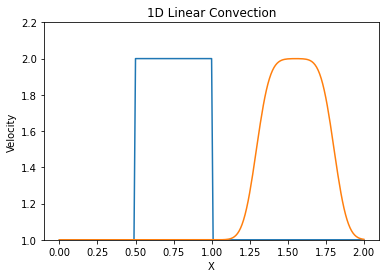

In [124]:
nx = 201
dx = 2 / (nx-1)
nt = 200    #nt is the number of timesteps we want to calculate
c = 1.      #assume wavespeed of c = 1
dt = 0.004
grid = np.linspace(0, 2, nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid, u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)
#Plotting data

plt.plot(grid, u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')
plt.show()

### $\textbf{For nx = 41}$

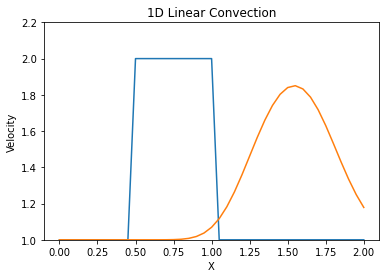

In [125]:
nx = 41
dx = 2 / (nx-1)
nt = 200    #nt is the number of timesteps we want to calculate
c = 1.      #assume wavespeed of c = 1
dt = 0.004
grid = np.linspace(0, 2, nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid, u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)

plt.plot(grid, u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')
plt.show()

### $\textbf{For nx = 81}$

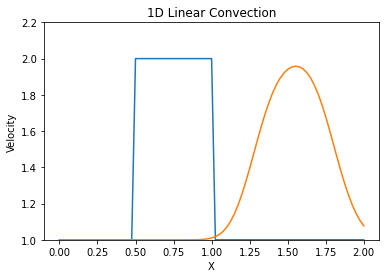

In [126]:
nx = 81
dx = 2 / (nx-1)
nt = 200    #nt is the number of timesteps we want to calculate
c = 1.      #assume wavespeed of c = 1
dt = 0.004
grid = np.linspace(0, 2, nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid, u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)
#Plotting data

plt.plot(grid, u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')
plt.show()

$\textbf{With 201 samples, the convection is better represented compared to 41 and 81 samples.}$

## $\textbf{Call Funtions}$

### $\textbf{Pure function}$

In [127]:
%timeit solve_1d_linearconv_pure(u, un, nt, nx, dt, dx, c)

50.7 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### $\textbf{ Function with numba accelerator}$

In [128]:
%timeit solve_1d_linearconv_numba(u, un, nt, nx, dt, dx, c)

140 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### $\textbf{Function with pyccel accelerator}$

In [129]:
solve_1d_linearconv_f90 = epyccel(solve_1d_linearconv_pyccel)

In [130]:
%timeit solve_1d_linearconv_f90(u, un, nt, nx, dt, dx, c)

39.3 µs ± 353 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


$\textbf{Numba implementation runs faster than pure function implementation. Pyccel accelerator does better than both.}$